# Error/Trend/Seasonality Models

The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS). We've already seen a simplistic way which was using Hodrick-Orescott filter.

# Seasonal Decomposition

Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.

We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).
A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

In [62]:
#import pandas and numpy library
import pandas as pd
import numpy as np
%matplotlib inline

In [63]:
#read your airline_passengers.csv file and set the Month col as time index
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [67]:
#remove nan from the database and show the first few rows
airline.dropna(inplace=True)
airline.head(50)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [68]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

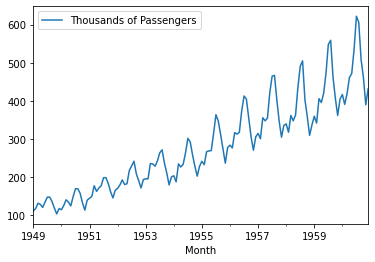

In [39]:
#show the line plot of number of passengers over time
airline.plot();

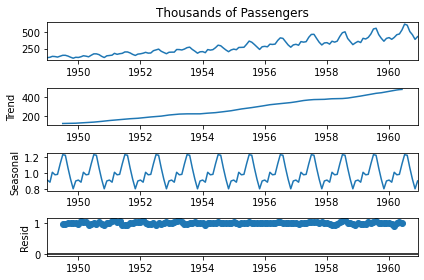

In [40]:
#import seasonal-decompose from the statsmodel and decompose the time series components in diffrent graphs

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

# SMA VS EWMA 

In this section we'll compare Simple Moving Averages to Exponentially Weighted Moving Averages in terms of complexity and performance.

In [41]:
#import pandas, numpy, and airline passenger data
import pandas as pd
import numpy as np
%matplotlib inline

We can find out the a simple moving average by applying a mean function to a rolling window.

In [42]:
#add two more col to dataset, one shows 6 month SMA, one shows 12 month SMA and show the first few rows
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [43]:
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


In [69]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


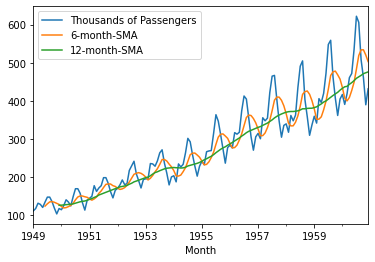

In [44]:
#use line plot to compare the actual data and diffrent moving average
airline.plot();

# Exponentially Weighted Moving Average

In [45]:
#add a new column and calculate the EWMA for the time span of 12 month
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

adjustbool, default True

Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average).

When adjust=True (default):

the EW function is calculated using weights wi=(1−α)i. For example, the EW moving average of the series [x0,x1,...,xt] would be:

yt=xt+(1−α)xt−1+(1−α)2xt−2+...+(1−α)tx01+(1−α)+(1−α)2+...+(1−α)t


When adjust=False, the exponentially weighted function is calculated recursively:

y0=x0

yt=(1−α)yt−1+αxt,

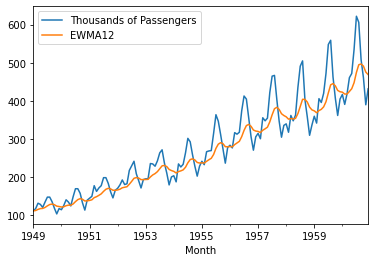

In [46]:
#plot the EWMA plot and actual data over time
airline[['Thousands of Passengers','EWMA12']].plot();

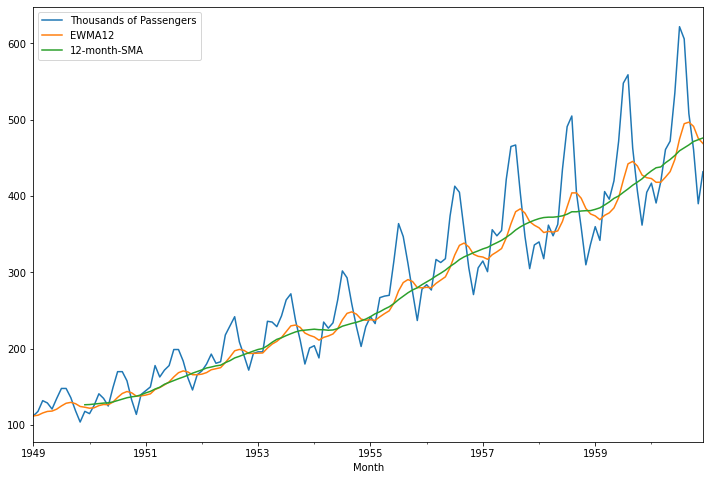

In [47]:
#compare the final performance of the SMA and EWMA with the actual data
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

The above example employed Simple Exponential Smoothing with one smoothing factor α. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above. In the next section we'll look at Double and Triple Exponential Smoothing with the Holt-Winters Methods.

# Holt-Winters Methods

In [48]:
#import pandas, numpy, and airline passenger data and remove the nan values
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.dropna(inplace=True)

In [49]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

# Setting a DatetimeIndex Frequency

Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.

In [50]:
#set the frequency to montly base
df.index.freq = 'MS'


In [51]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [52]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Simple Exponential Smoothing

A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas .ewm() method

In [53]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [54]:
#import simple exponential smoothing from the statsmodels, define alpha and span
span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


NOTE: For some reason, when optimized=False is passed into .fit(), the statsmodels SimpleExpSmoothing function shifts fitted values down one row. We fix this by adding .shift(-1) after .fittedvalues.

# Double Exponential Smoothing

In [55]:
#import ExponentialSmoothing from statsmodel and add a new col which calculate double exponential smoothing (trend =add)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237769
1949-02-01,118,112.923077,112.923077,120.237769
1949-03-01,132,115.857988,115.857988,134.237769
1949-04-01,129,117.879836,117.879836,131.237769
1949-05-01,121,118.359861,118.359861,123.237769


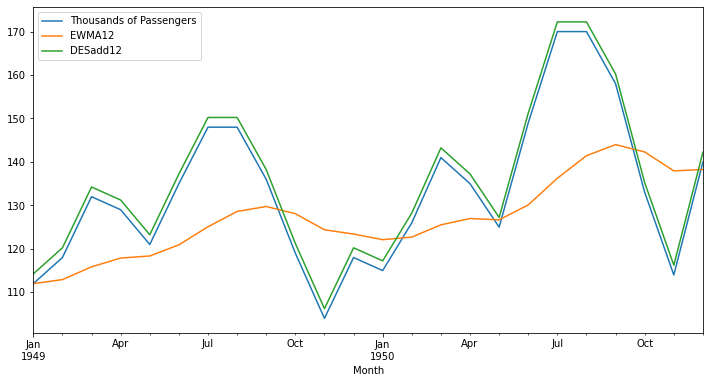

In [56]:
#compare the models
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [57]:
#recalculate the double exponential smoothing useing (trend = mul)
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.237769,112.049247
1949-02-01,118,112.923077,112.923077,120.237769,118.051885
1949-03-01,132,115.857988,115.857988,134.237769,132.058041
1949-04-01,129,117.879836,117.879836,131.237769,129.056722
1949-05-01,121,118.359861,118.359861,123.237769,121.053204


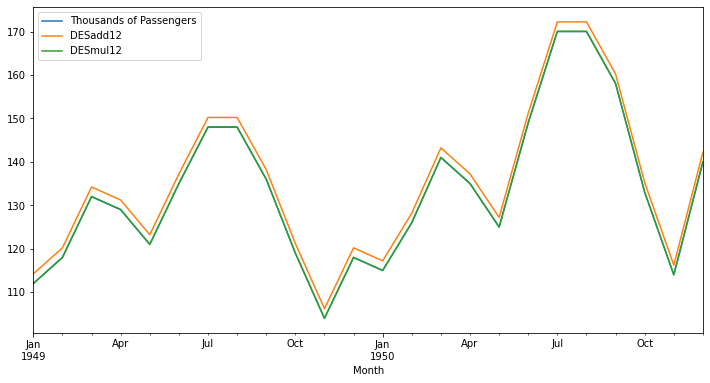

In [58]:
#compare diffrent models with actual data by using line plot for first 24 rows
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Triple Exponential Smoothing

Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

In [59]:
#add new column and show how the numbers going to change with triple exponential smoothing trend=add, seasonality=add
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.237769,112.049247,113.081187
1949-02-01,118,112.923077,112.923077,120.237769,118.051885,120.550946
1949-03-01,132,115.857988,115.857988,134.237769,132.058041,135.527185
1949-04-01,129,117.879836,117.879836,131.237769,129.056722,133.155131
1949-05-01,121,118.359861,118.359861,123.237769,121.053204,125.656034


In [60]:
#add new column and show how the numbers going to change with triple exponential smoothing trend=mul, seasonality=mul
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.237769,112.049247,113.081187,111.614881
1949-02-01,118,112.923077,112.923077,120.237769,118.051885,120.550946,118.863677
1949-03-01,132,115.857988,115.857988,134.237769,132.058041,135.527185,133.335923
1949-04-01,129,117.879836,117.879836,131.237769,129.056722,133.155131,127.925661
1949-05-01,121,118.359861,118.359861,123.237769,121.053204,125.656034,120.971844


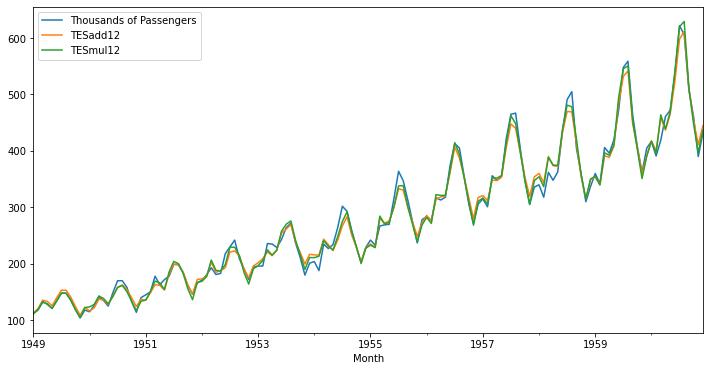

In [61]:
#compare last two models with actual data by using line plot 
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

# Statsmodels Time Series Excercises

In [ ]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

In [71]:
#import Energy production data for analyzing

df = pd.read_csv('EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [72]:
#1. Assign a frequency of 'MS' to the DatetimeIndex.
df.index.freq = 'MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

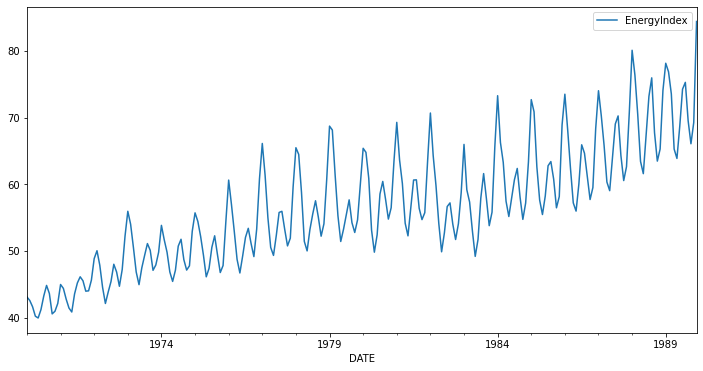

In [73]:
#2. Plot the dataset.
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

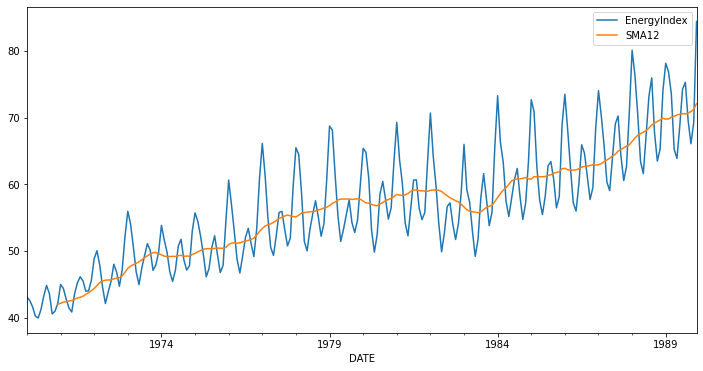

In [74]:
#3. Add a column that shows a 12-month Simple Moving Average (SMA).Plot the result.
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

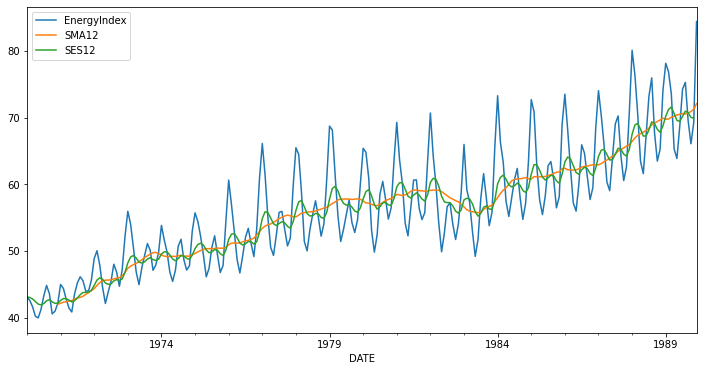

In [75]:
#4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the
#statsmodels SimpleExpSmoothing function. Plot the result.
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df['SES12']=SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);


C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Amir\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


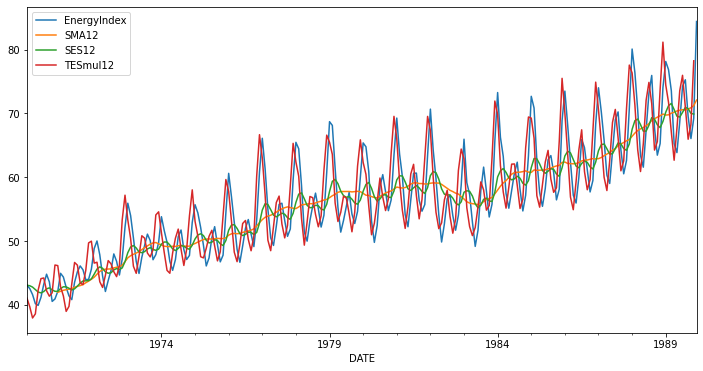

In [76]:
#5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models.
#Plot the result.
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
df.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

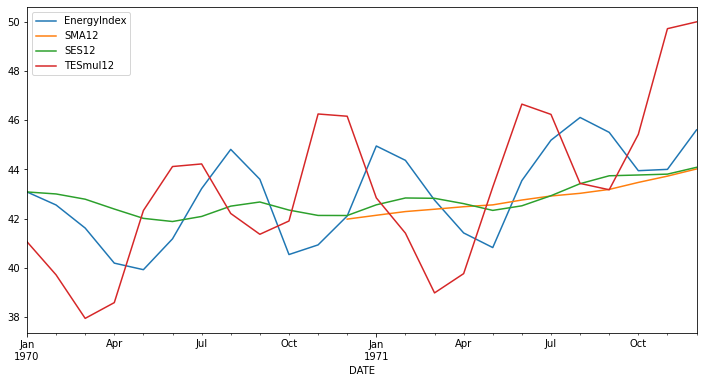

In [77]:
df.iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);